## Motivation

Source: http://dados.ufrn.br/

- Investigate the trend of hiring teachers over the years
- Classify teachers by years worked (young or mature)

Importing the packages
==

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns



Collect data
==

In [2]:
url_faculty = 'http://bit.do/faculty_members'

# create a dataframe with data of faculty members
df_faculty = pd.read_csv(url_faculty, sep=';')

# delete unnecessary columns
# axis (0 to rows and 1 to columns)
df_faculty.drop('Unnamed: 13',axis = 1, inplace=True)

# exploratory data analysis
df_faculty.head()



,id_servidor,siape,nome,categoria,cargo,tipo_jornada_trabalho,tipo_regime_juridico,situacao_servidor,classe_funcional,id_unidade,unidade,admissao,data_desligamento
0,21511,350411,ABIATA MARTINS,Técnico Administrativo,MARCENEIRO,40 horas semanais,Estatutário,Aposentado,S ...,3404,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1981-10-06 00:00:00,1998-10-23
1,20341,349235,ABIGAIL CALDAS BATISTA GONDIM,Técnico Administrativo,ENGENHEIRO-AREA,40 horas semanais,Estatutário,Aposentado,E ...,446,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,1979-04-01 00:00:00,2010-07-22
2,16738,345587,ABIGAIL DE ANDRADE SOUZA,Docente \n,PROFESSOR DO MAGISTERIO SUPERIOR,Dedicação exclusiva,Estatutário,Aposentado,Classe C - Adjunto ...,9,DAP/PROGESP - DIRETORIA DE ADMINISTRACAO DE PE...,1969-10-21 00:00:00,1988-08-11
3,17716,346588,ABIGAIL MOURA,Docente \n,PROFESSOR DO MAGISTERIO SUPERIOR,Dedicação exclusiva,Estatutário,Aposentado,Classe C - Adjunto ...,3404,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1976-05-01 00:00:00,1996-05-10
4,17001,345855,ABILIO FONSECA DE SOUSA,Técnico Administrativo,ASSISTENTE EM ADMINISTRACAO,40 horas semanais,Estatutário,Aposentado,D ...,4659,REITORIA,1960-06-15 00:00:00,1990-06-13


Preparing & cleaning
==

In [3]:
# investigating categories of faculty members
df_faculty.categoria.unique()


array(['Técnico Administrativo', 'Docente                       \n'], dtype=object)

In [4]:
# filtering only teachers category
df_faculty = df_faculty[df_faculty.categoria == 'Docente                       \n']


In [5]:
# calculate the number of years worked
df_faculty['hiring_year'] = pd.to_datetime(df_faculty['admissao']).dt.year
df_faculty['resignation_year'] = pd.to_datetime(df_faculty['data_desligamento']).dt.year
df_faculty['years_worked'] = df_faculty['resignation_year'] - df_faculty['hiring_year']


In [6]:
# calculate the number of hiring and sorting by year
hiring = df_faculty.hiring_year.value_counts().sort_index()


In [7]:
# calculate the number of resignations and sorting by year
resignation = df_faculty.resignation_year.value_counts().sort_index()


In [8]:
# create a new dataframe with information about hiring and resignation
balance = pd.DataFrame({'Hiring': hiring, 'Resignation': resignation})


In [9]:
# fill the NAN values with zeros
balance.Resignation.fillna(0.0, inplace=True)


In [10]:
# create a balance amount column
balance['balance'] = 0.0


In [11]:
aux = 0
for i, row in balance.iterrows():
    aux = (row.Hiring - row.Resignation) + aux
    balance.loc[i,'balance'] = aux
    
    

In [12]:
balance.head()


,Hiring,Resignation,balance
1954,3,0.0,3.0
1959,1,0.0,4.0
1961,25,0.0,29.0
1962,30,0.0,59.0
1963,2,0.0,61.0


### Investigate the trends of hiring teachers over the years

/Users/ivanovitch/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


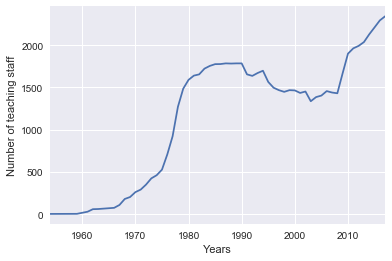

In [13]:
sns.set(style="darkgrid")

# create a timeseries figure with information about
# the number of faculty members along the years
ax = sns.tsplot(data=balance.balance, time=balance.index)

# configure the axes
ax.set(xlabel='Years', ylabel='Number of teaching staff')
plt.show()


### Classify teachers by age (young or mature)

In [14]:
# verify the type of faculty member
df_faculty.situacao_servidor.unique()


array(['Aposentado', 'Ativo Permanente'], dtype=object)

In [15]:
# filtering by active members
df_faculty = df_faculty[df_faculty.situacao_servidor == 'Ativo Permanente']


In [16]:
# update information about the years worked
df_faculty.years_worked = 2017 - df_faculty.hiring_year


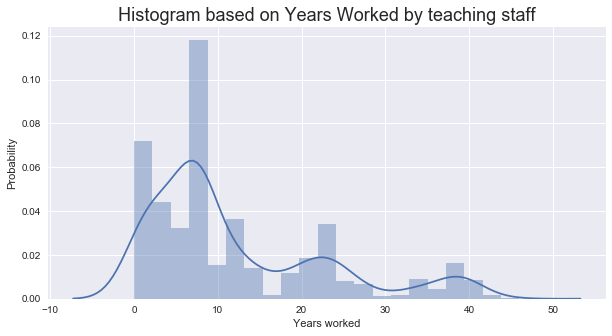

In [17]:
# create a figure
fig, ax = plt.subplots(figsize=(10,5))

# increase the size of fonts
sns.set(font_scale=1.5)

# print a histogram based on years worked by teaching staff
sns.distplot(df_faculty.years_worked)

# labels
ax.set(xlabel='Years worked', ylabel='Probability')

plt.title('Histogram based on Years Worked by teaching staff')
plt.show()


In [18]:
# remove blank spaces
df_faculty.classe_funcional = df_faculty.classe_funcional.apply(lambda x: x.strip())


In [19]:
df_faculty.classe_funcional.unique()


array(['Classe C - Adjunto', 'Classe E - Titular',
       'Classe A - Assistente A', 'Classe B - Assistente', 'DV',
       'Classe D - Associado', 'DIII', 'Classe A - Adjunto A',
       'Classe A - Auxiliar', 'DIV', 'DI', 'DII', 'C', 'D'], dtype=object)

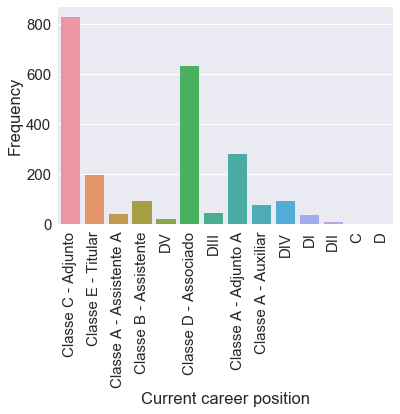

In [20]:
# imprimir o histograma pela classe funcional
g = sns.countplot(df_faculty.classe_funcional)

# rotacionar os labels
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.xlabel('Current career position')
plt.ylabel('Frequency')
plt.show()
